 # Scikit Learn 1

## 0. end to end scikit learn workflow

In [1]:
# 1. get the data ready 
import pandas as pd 
import numpy as np
heart_disease =pd.read_csv("heart-disease.csv")
heart_disease


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# create x which is called features matrix 
X = heart_disease.drop("target" , axis = 1)

# create y label 
y = heart_disease["target"]

In [3]:
# 2.choosing the right model and hyperparameters 

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# keeping the default parameter 
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3.  fit the model to the training data 
from sklearn.model_selection import train_test_split 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.5)

In [5]:
clf.fit(X_train , y_train)

RandomForestClassifier()

In [6]:
# 3. making a prediction 
y_preds =clf.predict(X_test)
y_preds



array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1],
      dtype=int64)

In [7]:
# 4 . Evaluate the model 
clf.score(X_train , y_train)

1.0

In [8]:
clf.score(X_test , y_test)

0.7171052631578947

In [9]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70        68
           1       0.76      0.71      0.74        84

    accuracy                           0.72       152
   macro avg       0.72      0.72      0.72       152
weighted avg       0.72      0.72      0.72       152



In [10]:
confusion_matrix(y_test , y_preds)

array([[49, 19],
       [24, 60]], dtype=int64)

In [11]:
accuracy_score(y_test , y_preds)

0.7171052631578947

In [12]:
# . 5 . improve a model 
# tryng different amount of estimators 
np.random.seed(42)
for i in range (10 , 100 ,10):
    print(f"Trying model with {i} estimators . ")
    clf =  RandomForestClassifier(n_estimators= i).fit(X_train , y_train)
    print(f"model accuracy on test set : {clf.score(X_test,y_test)*100:.2f}%")
    print(" ")

Trying model with 10 estimators . 
model accuracy on test set : 69.08%
 
Trying model with 20 estimators . 
model accuracy on test set : 77.63%
 
Trying model with 30 estimators . 
model accuracy on test set : 74.34%
 
Trying model with 40 estimators . 
model accuracy on test set : 77.63%
 
Trying model with 50 estimators . 
model accuracy on test set : 74.34%
 
Trying model with 60 estimators . 
model accuracy on test set : 77.63%
 
Trying model with 70 estimators . 
model accuracy on test set : 75.66%
 
Trying model with 80 estimators . 
model accuracy on test set : 76.32%
 
Trying model with 90 estimators . 
model accuracy on test set : 76.97%
 


In [13]:
# 6. Save a model and load it ..

import pickle
pickle.dump(clf , open("random_forest_model_1.pkl" , "wb"))

In [14]:
loaded_model = pickle.load(open("random_forest_model_1.pkl" , "rb"))
loaded_model.score(X_test , y_test)

0.7697368421052632

## 2 . Getting the data ready 

In [15]:
#standard imports 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

### Steps to follow
####  1. splitting the data into featres and labels (X & y)
####  2. flling (also called imputing) or disregarding missing values
####  3. convertingnon-numerical calues to numeric(feature incoding)

In [16]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
X = heart_disease.drop("target" , axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
# split the data into trainig and test sets 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2)

In [20]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [21]:
X.shape

(303, 13)

In [22]:
# data science tip 

#1  Clean data(missing,unnessary)-->
#2  Transform data(numbers,si units)-->
#3  Reduce data(column reduction)

### 1.1 Make sure its all numerical

In [23]:
car_extsales = pd.read_csv("car-sales-extended.csv")
car_extsales



,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [24]:
car_extsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [25]:
car_extsales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# split into x and y
X = car_extsales.drop("Price" , axis =1)
y= car_extsales["Price"]

# splitting into trainig and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y ,test_size =0.2)

In [27]:
# build machine learning model
# y_test)

In [28]:
#turn categories into nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" ,"Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ( [ ( "one_hot" ,
                                      one_hot ,
                                     categorical_features) ] ,
                                   remainder ="passthrough")
                                 
transformed_X =transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [29]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [30]:
#option 2 
# dummies = pd.get_dummies(car_sales[["Make" , "Colour" , "Doors"]])
# dummies

## # 1.2 What if there were missing values ?

1. fill them with some values called as imputation
2. remove the samples with missing data all together

In [31]:
car_mi_extsales = pd.read_csv("car-sales-extended-missing-data.csv")
car_mi_extsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [32]:
car_mi_extsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [33]:
car_mi_extsales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [34]:
# create X and y 

X = car_mi_extsales.drop("Price" , axis = 1)
y = car_mi_extsales["Price"]

In [35]:
# lets try and convert data to nos 

#turn categories into nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" ,"Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ( [ ( "one_hot" ,
                                      one_hot ,
                                     categorical_features) ] ,
                                   remainder ="passthrough")
                                 
transformed_X =transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

#### option 1  fill missing data with pandas 

In [36]:
# fill the make column 
car_mi_extsales["Make"].fillna("missing" , inplace = True)

# Fill the colour columns 
car_mi_extsales["Colour"].fillna("missing" , inplace = True)

# fill the odometer km column 
car_mi_extsales["Odometer (KM)"].fillna(car_mi_extsales["Odometer (KM)"].mean() , inplace = True )

# fill the dooors columns 
car_mi_extsales["Doors"].fillna(4 , inplace = True)

C:\Users\Ayush Aryan\AppData\Local\Temp\ipykernel_9676\2996628972.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_mi_extsales["Make"].fillna("missing" , inplace = True)
C:\Users\Ayush Aryan\AppData\Local\Temp\ipykernel_9676\2996628972.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

In [37]:
car_mi_extsales.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [38]:
# remove rows with missing price values 
car_mi_extsales.dropna(inplace = True)


In [39]:
car_mi_extsales.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [40]:
len(car_mi_extsales)

950

In [41]:
X = car_mi_extsales.drop("Price" , axis = 1)
y = car_mi_extsales["Price"]

In [42]:
# lets try and convert data to nos 

#turn categories into nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" ,"Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ( [ ( "one_hot" ,
                                      one_hot ,
                                     categorical_features) ] ,
                                   remainder ="passthrough")
                                 
transformed_X =transformer.fit_transform(car_mi_extsales)
transformed_X


array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### option 2. Fill missing values with scikit learn 

In [43]:
car_mi_extsales = pd.read_csv("car-sales-extended-missing-data.csv")
car_mi_extsales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [44]:
car_mi_extsales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [45]:
# drop rows with no labels 
car_mi_extsales.dropna(subset = ["Price"] , inplace = True)
car_mi_extsales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [46]:
# split into X and y 
X = car_mi_extsales.drop("Price" , axis = 1)
y = car_mi_extsales["Price"]

In [47]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [48]:
# fill missing values with scikit - learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical values with mean 
cat_imputer = SimpleImputer(strategy="constant" , fill_value="missing")
door_imputer = SimpleImputer(strategy="constant" , fill_value = 4)
num_imputer = SimpleImputer(strategy ="mean")

# define columns 
cat_features = ["Make" , "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# create an imputer (something that fills missing data )
imputer =ColumnTransformer([
    ("cat_imputer" , cat_imputer , cat_features),
    ("door_imputer" , door_imputer , door_features),
    ("num_imputer" ,num_imputer , num_features)
])

# transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [49]:
car_sales_filled = pd.DataFrame(filled_X ,
                               columns = ["Make","Colour","Doors","Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [50]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [51]:
#turn categories into nums 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make" , "Colour" ,"Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer ( [ ( "one_hot" ,
                                      one_hot ,
                                     categorical_features) ] ,
                                   remainder ="passthrough")
                                 
transformed_X =transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [52]:
# now we have got our data as no and filled (no missing values )

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(transformed_X ,
                                                      y , test_size=0.2
                                                      )
model = RandomForestRegressor()
model.fit(X_train , y_train)
model.score(X_test , y_test)


0.21990196728583944

## 2 . Choosing the right algorithm for your problem

Some things to note :
* Sklearn refers to mahine learning models , algorithms as estimators .
* Classification problem - predicting a category (heart disease or not )
        *Sometimes we will see clf (short for classifier) used as        classification estimator
*Regression problem - predicting a number (selling price of a car)


Sklearn ml map : <img src = "ml_map.png">

### 2.1 Pincking a michine learning problem for a regression problem

In [53]:
# get  California housing dataset
from sklearn.datasets import fetch_california_housing
housing =fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [54]:
housing_df = pd.DataFrame(housing["data"] , columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [55]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [56]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [57]:
housing_df["target"] = housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [58]:
# import algorithm / estimator
from sklearn.linear_model import Ridge

#setup random seed
np.random.seed(42)

# create the data 
X = housing_df.drop("target" , axis = 1)
y = housing_df["target"] #median housing price in $100,000

#split into train and test sets 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# instantiate and fit the model (on the training set )
model = Ridge()
model.fit(X_train , y_train)

# check score of the model
model.score(X_test , y_test)   # cofficient of determination


0.5758549611440131

In [59]:
from sklearn.linear_model import Lasso

#setup random seed
np.random.seed(42)

# creating data
X = housing_df.drop("target" , axis = 1 )
y = housing_df["target"]

# split into train and test sets 

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)


# instantiate and fit  the model
model = Lasso()
model.fit(X_train , y_train)

# check score of the model 
model.score(X_test , y_test)

0.2841671821008396

In [60]:
# import the random forest regressor 

from sklearn.ensemble import RandomForestRegressor

# setup random seed 
np.random.seed(42)

#create the data
X = housing_df.drop("target" , axis =1 )
y = housing_df["target"]

# split into train & test sets 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#create random froest model 
model = RandomForestRegressor()
model.fit(X_train , y_train)

# check score of the model on the test 
model.score(X_test , y_test)

0.8065734772187598

In [61]:
## 2.2 Classification data set problem 

In [62]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


consulting the map and it says to try linear svc 


In [63]:
# import the linearSVC estimator class
from sklearn.svm import LinearSVC

#setup random seed 
np.random.seed(42)

# make the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# instatntiate linearSVC
clf = LinearSVC()
clf.fit(X_train , y_train)

# check the results of model
clf.score(X_test,y_test)




C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [64]:
heart_disease["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [65]:
# by randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed 
np.random.seed(42)

# make the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# instatntiate linearSVC
clf = RandomForestClassifier()
clf.fit(X_train , y_train)

# check the results of model
clf.score(X_test,y_test)


0.8524590163934426

#### Tidbid :
    1.If you have structured data , use ensemble methods 
    2.If you have unstructured data(images, audio, text) , use deep learning or transfer learning.

## 3 .Fit the model 

### 3.1 fitting the model to the data 

X = features  , feature variables , data  

y = labels , targets  , target variables

 fit figures out the patterns between data of X and target y 


In [66]:
# by randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

#setup random seed 
np.random.seed(42)

# make the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# instatntiate linearSVC
clf = RandomForestClassifier()

# fit the model to the data(trainig the model)
clf.fit(X_train , y_train)

# check the results of model
clf.score(X_test,y_test)


0.8524590163934426

In [67]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [68]:
X.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


### . 3.2 make predictions using machine learning model 

2 ways to make predictions 

    1.predict
    2.predict_proba()

In [69]:
# use a trained model to make predictions 

clf.predict(X_test)



array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [70]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [71]:
# compare predictions to truth labels to evaluate the model 
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [72]:
clf.score(X_test , y_test)

0.8524590163934426

In [73]:
 from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_preds)

0.8524590163934426

Make predictions with predict_proba



In [74]:
# predict_proba() returns probabilities  of all classification labels 
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [75]:
# now usinmg predict 
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

'predict()' can also be used for regression models 

In [76]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [77]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data 
X = housing_df.drop("target" , axis =1 )
y = housing_df["target"]

# split into training and test sets 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

# create model instance 
model = RandomForestRegressor()

#fit the model to data 
model.fit(X_train , y_train)

# make predictctions 
y_preds = model.predict(X_test)


In [78]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [79]:
np.array (y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [80]:
len(y_preds)

4128

In [81]:
len(y_test)

4128

In [82]:
#compare the predictions to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , y_preds)

0.32659871732073664

In [83]:
housing_df["target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: target, Length: 20640, dtype: float64

## 4. Evaluating a Machine learning model

#### 4.1 Evaluating a model with the score() method 

In [84]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis = 1 )
y = heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train , y_train)


RandomForestClassifier()

In [85]:
# highet value for the score method is 1.0 and the lowest value os 0.0 
# score returns mean accuracy 
# training score is always higher than test score 
clf.score(X_train , y_train)

1.0

In [86]:
clf.score(X_test , y_test)

0.8524590163934426

#### score method on the regression problem (housing_df)

In [87]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [88]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42) 

X  = housing_df.drop("target" , axis = 1)
y  = housing_df["target"]

X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2)

reg = RandomForestRegressor()

reg.fit(X_train , y_train)

reg.score(X_test , y_test)


0.8065734772187598

In [89]:
reg.score(X_train , y_train)

0.9736801960414609

In [90]:
y_test.mean()

2.0550030959302323

#### 4.2 Evaluating a model using the 'scoring' parameter 

In [91]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target" , axis = 1 )
y = heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train , y_train);



In [92]:
clf.score(X_test , y_test)

0.8524590163934426

In [93]:
# cross validation trains 5 different versions of models . 5 different trainig datas are done and then evaluated 
# we can use cv in brackets to alter number of splits 
cross_val_score(clf , X , y , cv = 50)

array([1.        , 1.        , 0.71428571, 1.        , 0.83333333,
       0.66666667, 1.        , 0.83333333, 0.83333333, 1.        ,
       0.5       , 1.        , 0.83333333, 0.66666667, 0.66666667,
       1.        , 1.        , 1.        , 0.83333333, 0.83333333,
       1.        , 0.83333333, 1.        , 0.5       , 1.        ,
       0.5       , 0.83333333, 0.83333333, 0.83333333, 0.83333333,
       0.66666667, 0.66666667, 0.66666667, 0.83333333, 1.        ,
       0.5       , 1.        , 1.        , 0.83333333, 0.66666667,
       0.83333333, 0.33333333, 0.83333333, 0.83333333, 0.66666667,
       0.66666667, 0.83333333, 0.66666667, 0.83333333, 0.83333333])

In [94]:
np.random.seed(42)

#single training and test split scor 
clf_single_score = clf.score(X_test , y_test)

#take mean of 5 fold cross validation score 
clf_cross_val_score = np.mean(cross_val_score(clf , X , y))

#comparing the two 
clf_single_score , clf_cross_val_score

# cross validation metric is preffered even after being low as its precise .

(0.8524590163934426, 0.8248087431693989)

In [95]:
# the scoring paramater set to none by default 
cross_val_score(clf , X , y , scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evatuation metrics 

1. Accuracy 
2. Area under Roc curve 
3. Confusion matrix 
4. Classification report 

In [96]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42) 

X = heart_disease.drop("target"  , axis = 1 )
y = heart_disease["target"]

clf=RandomForestClassifier()
cross_val_score = cross_val_score(clf , X , y , cv= 5)


In [97]:
np.mean(cross_val_score)

0.8248087431693989

In [98]:
print(f"Heart Disease Classifier Cross-validated Accuracy : {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-validated Accuracy : 82.48%


In [99]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Area under rhe reciever operating characterstic curve(AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are comparison of a models true positive rate(tpr) and a models false positive rate (fpr).

* True positive  = model predicts 1 when truth is 1
*  False posituve = model predicts 0 when truth is 0
*  true negative = model predicts 0 when truth is 0
*  false negative = model predicts 0 when truth is 1 

In [100]:
# create X_test 
X_train , X_test , y_train , y_test = train_test_split(X ,y , test_size=0.2)

In [101]:
from sklearn.metrics import roc_curve

#fit the classiifer 
clf.fit(X_train , y_train)


#make predictions with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10]



array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [102]:
y_probs_positive = y_probs[ : , 1 ]
y_probs_positive[ :10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [103]:
# calculate fpr , tpr and threshholds 
fpr , tpr , thresholds = roc_curve(y_test , y_probs_positive)

# check check the fpr 
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

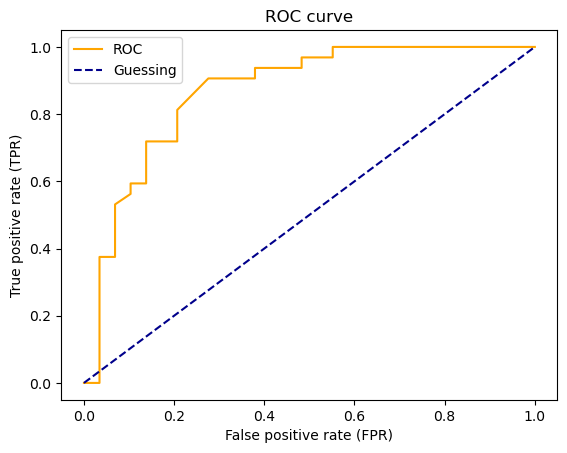

In [104]:
# create a funtion for plotting ROC curves 
import matplotlib.pyplot as plt

def plot_roc_curve(fpr , tpr):
   # plots a roc curve given the false positive rate (fpr)
   #      and TRUE POSITIVE rate (tpr) of a model

   #plot roc curve 
    plt.plot(fpr , tpr , color= "orange" , label = "ROC")

#plot line with no predictive power (baseline )
    plt.plot([0,1] , [0,1] , color="darkblue" , linestyle="--", label="Guessing")

# customise the plot 
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("ROC curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr , tpr)


         

In [105]:
from sklearn.metrics import roc_auc_score
# auc - area under thr curve 

roc_auc_score(y_test , y_probs_positive)

0.8669181034482759

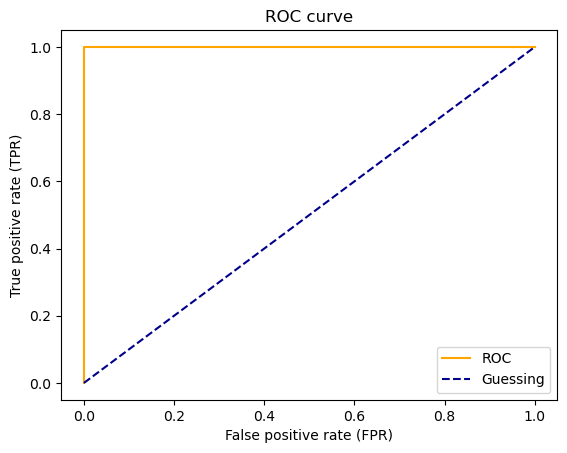

In [106]:
# plot perfect Roc curve and auc score 
fpr , tpr, thresholds = roc_curve(y_test , y_test)
plot_roc_curve(fpr , tpr)

In [107]:
# perfect auc score 
roc_auc_score(y_test , y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and actual labels it was supposed to predict 

In essence giving you and idea of where the model is gwtting confused 

In [108]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test , y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [109]:
# visualise confusion matrix with pd.crosstab()
pd.crosstab(y_test ,
            y_preds,
            rownames=["actual labels"] ,
            colnames=["Predicted Labels"])

Predicted Labels,0,1
actual labels,,
0,23,6
1,6,26


In [110]:
22+7+8+24


61

In [111]:
len(y_preds)

61

<Axes: >

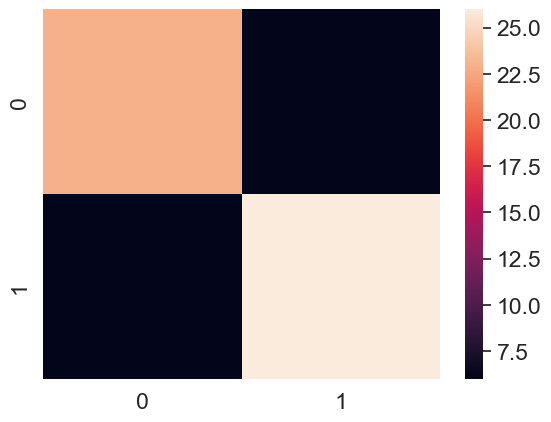

In [112]:
# make our confusion matrix more visual with seaborn heatmap
import seaborn as sns

#set the font scale 
sns.set(font_scale =1.5)

#create a confusion matrix 
conf_mat = confusion_matrix(y_test , y_preds)

#plot it using seaborn
sns.heatmap(conf_mat)


**Confusion Matrix**

  way to evaluete classification model


In [113]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test , y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [114]:
pd.crosstab(y_test , y_preds,
           rownames=["actual label"],
           colnames=["predicted label"])

predicted label,0,1
actual label,,
0,23,6
1,6,26


### Creating a confusion matrix using scikit-learn

To use the new methods of creating a confusion matrix with scikit learn we use latest version 


In [115]:
import sklearn 
sklearn.__version__

'1.3.0'

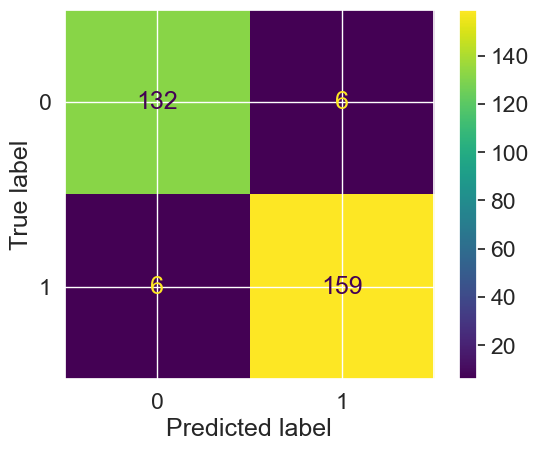

In [116]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator= clf , X=X , y=y);


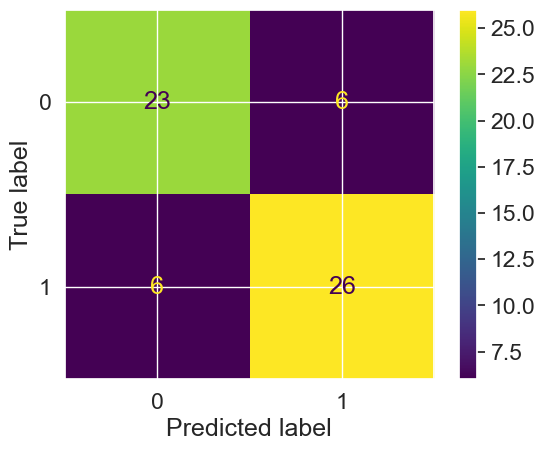

In [117]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test ,
                                       y_pred=y_preds);


**Classification Report**

In [118]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [119]:
# where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0]=  1 # only 1 positive case 

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.4.4 Regression model evaluation metrics 

1. R^2 (r-squared or cofficient of determination ) : Compares your models predicstions to the mean of the targets . Values can range from negative infinity to 1 .For example of all your model does is predict the mean of the targets , its R^2 value would be 0. and if your model prefectyly predicts a range of nos its r^2 will be 1.

2. Mean absolute error
3. Mean squared error


In [120]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=housing_df.drop("target" , axis = 1)
y=housing_df["target"]

X_train , X_test ,y_train , y_test = train_test_split(X ,y , test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train , y_train)



RandomForestRegressor()

In [121]:
model.score(X_test , y_test)

0.8065734772187598

In [122]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [123]:
y_test.mean()

2.0550030959302323

In [124]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean = np.full(len(y_test) , y_test.mean())

In [125]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [126]:
r2_score(y_true=y_test ,
        y_pred = y_test_mean)

0.0

In [127]:
r2_score(y_true=y_test ,
        y_pred = y_test)

1.0

**Mean absolute error  (MAE)** 

MAE is the average of absolute differences between predictions and calues .
it gives you idea of how wrong your predictions are 

In [128]:
#MAE
from sklearn .metrics import mean_absolute_error

y_preds =model.predict(X_test)
mae = mean_absolute_error(y_test , y_preds)

mae



0.32659871732073664

In [129]:
 df = pd.DataFrame(data = {"actual values" : y_test ,
                          "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [130]:
np.abs(df["differences"]).mean()  # abs = absolute 

0.32659871732073664

**Mean squared error**

MSE is the mean of the square of the errors betweeen the predicted values 

In [131]:
# mean squared error 
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test , y_preds)
mse


0.2534678520824551

In [132]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [133]:
# calculate mse by hand 
squared = np.square(df["differences"])
squared.mean()

0.2534678520824551

In [134]:
df_large_error= df.copy()
df_large_error.iloc[0]["squared_differences"] = 16


C:\Users\Ayush Aryan\AppData\Local\Temp\ipykernel_9676\2947994239.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared_differences"] = 16


In [135]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [136]:
# calculate mse with large error

df["squared_differences"].mean()

0.2534678520824551

In [137]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.220380,-0.412620,0.170255
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [138]:
# mse is generally higher than mae

### 4.2.3. Finally using the scoring paramater 

In [139]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X= heart_disease.drop("target" , axis =1  )
y = heart_disease["target"]

clf = RandomForestClassifier()

In [140]:
np.random.seed(42)

# cross validation accuracy : splitting data set into multiple test 
# and train set 
cv_acc = cross_val_score(clf , X , y , cv = 5 , scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [141]:
# cross validated accuracy 
print(f"the cross validated accuracy is : {np.mean(cv_acc)*100:.2f}% ")

the cross validated accuracy is : 82.48% 


In [142]:
np .random.seed(42)
cv_acc = cross_val_score(clf , X , y , cv = 5 , scoring = "accuracy")

cv_acc



array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [143]:
# cross validated accuracy 
print(f"the cross validated accuracy is : {np.mean(cv_acc)*100:.2f}% ")

the cross validated accuracy is : 82.48% 


In [144]:
# precision 

np.random.seed(42)
cv_precision = cross_val_score(clf ,X ,y ,cv =5 , scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [145]:
# cross validatesd precision 
print(f"the cross validated precision is : {np.mean(cv_precision)}% ")

the cross validated precision is : 0.8329547346025924% 


In [146]:
# recall 
np.random.seed(42)
cv_recall = cross_val_score(clf , X , y , cv =5 , scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [147]:
# cross validatesd precision 
print(f"the cross validated  recall is : {np.mean(cv_recall)}% ")

the cross validated  recall is : 0.8545454545454545% 


Lets see the scoring parameter being uesed for a regression problem 

In [148]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target" , axis = 1)
y = housing_df["target"]

model = RandomForestRegressor()


In [149]:
np.random.seed(42)
cv_r2 = cross_val_score(model , X , y , cv = 3 , scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [150]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [151]:
# mean squared  error 
cv_mse = cross_val_score(model , X , y , cv = 3
                         , scoring ="neg_mean_squared_error" )
np.mean(cv_mse)

-0.4626304189468596

In [152]:
# mean absolute error 
cv_mae = cross_val_score(model , X , y , cv=3 
                         , scoring = "neg_mean_absolute_error")
np.mean(cv_mae)

-0.4820330437306202

In [153]:
cv_mse

array([-0.51816064, -0.33163551, -0.53809511])

In [154]:
cv_mae

array([-0.5173712 , -0.4219676 , -0.50676033])

## 4.3 using different evaluation metrics as scikit learn functions 

In [155]:
from sklearn.metrics import accuracy_score , precision_score,recall_score , f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = heart_disease.drop("target" , axis = 1)
y=heart_disease["target"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train , y_train)

# make prediction
y_preds = clf.predict(X_test)

print("Classification Metrics on the test set ")
print(f"accuracy : {accuracy_score (y_test , y_preds)*100:.2f}%")
print(f"precision : {precision_score (y_test , clf.predict(X_test))}")
print(f"Recall : {recall_score (y_test , clf.predict(X_test))}")
print(f"f1 : {f1_score (y_test , clf.predict(X_test))}")

Classification Metrics on the test set 
accuracy : 85.25%
precision : 0.8484848484848485
Recall : 0.875
f1 : 0.8615384615384615


In [156]:
from sklearn.metrics import r2_score , mean_absolute_error , mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = housing_df.drop("target" ,axis =1)
y = housing_df["target"]

X_train , X_test , y_train , y_test = train_test_split(X ,  y , test_size=0.2)

model  =RandomForestRegressor()

model.fit(X_train  , y_train)

y_preds  =model.predict(X_test)


print("Regression metrics on the test set")
print(f"R2 score :  {r2_score(y_test  , y_preds)}")
print(f"MAE :  {mean_absolute_error(y_test  , y_preds)}")
print(f"MSE :  {mean_squared_error(y_test  , y_preds)}")


Regression metrics on the test set
R2 score :  0.8065734772187598
MAE :  0.32659871732073664
MSE :  0.2534678520824551


## 5. Improving a model

First predictions  = baseline prediction 
first model = baseline models 

**from a data perspective  :**
 * Could we collect more data ?
 * Could we improve our data ?

**from a model prespective :**
 * Is there a better model we can use ?
 * Could we improve the current model ?

**parameter / hyperparameters define ()**
parameters = models find therse pattern in data
hyperparamaters = settings on a mdoel you can adjust to improve its quality

**3 ways to adjust hyper parameters :**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV


In [157]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [158]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

Training set -> Validation set -> Test set 

lets make the following 3 sets :-


In [159]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:
 * max_depth
 * max_features 
 * min_samples_leaf
 * min_samples_split
 * n_estimators


In [160]:
def evaluate_preds(y_true , y_preds) :
    
    accuracy = accuracy_score(y_true , y_preds)
    precision = precision_score(y_true , y_preds)
    recall = recall_score(y_true , y_preds)
    f1 = f1_score(y_true , y_preds)
                  
    metric_dict = {
     "accuracy" : round(accuracy , 2) ,
     "precision": round(precision , 2) ,
     "f1" : round(f1 , 2) }

    print(f"accuracy : {accuracy*100}%")
    print(f"Precision : {precision}")
    print(f"Recall :{recall}")
    print(f"F1 score : {f1}")

    return metric_dict

In [161]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [162]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data 
heart_disease_shuffled = heart_disease.sample(frac = 1)

# split into  X and y 
X  = heart_disease_shuffled.drop("target" , axis= 1)
y  = heart_disease_shuffled["target"]

# split the data into training validation and test sets 
train_split = round(0.7 * len(heart_disease_shuffled)) # 70 % of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
# 15 % of data

# split data into train , validation and test sets 
X_train , y_train = X[ : train_split] , y[ : train_split]
X_valid , y_valid = X[train_split : valid_split] , y[train_split : valid_split]
X_train , y_train = X[:train_split] , y[:train_split]
X_valid , y_valid = X[train_split : valid_split] , y[train_split:valid_split]
X_test , y_test = X[valid_split :] , y[:valid_split]

len(X_train) , len(X_valid) , len(X_test)


clf = RandomForestClassifier()
clf.fit(X_train , y_train) 

# make prediction
y_preds = clf.predict(X_valid)

#evaluate the classifier in validation set
baseline_metrics = evaluate_preds(y_valid , y_preds)
baseline_metrics




accuracy : 82.22222222222221%
Precision : 0.8148148148148148
Recall :0.88
F1 score : 0.8461538461538461


{'accuracy': 0.82, 'precision': 0.81, 'f1': 0.85}

In [163]:
np.random.seed(42)

# create second classifier with different hyperparameter s
clf_2 = RandomForestClassifier(n_estimators=150)
clf_2.fit(X_train , y_train)

# make predication with different hyperparamaters 
y_preds_2 = clf_2.predict(X_valid)

# evaluate the 2nd classifier 
clf_2_metrics = evaluate_preds(y_valid , y_preds_2)

accuracy : 80.0%
Precision : 0.8076923076923077
Recall :0.84
F1 score : 0.8235294117647058


### 5.2 Hyperparamter tuning with RandomizedSearchCV

In [164]:
from sklearn.model_selection import RandomizedSearchCV

grid = { "n_estimators" : [10 ,100 , 200 ,500 ,1000 ,1200] , 
         "max_depth" : [None , 5, 10 ,20 ,30] ,
         "max_features" :["auto" , "sqrt"] ,
         "min_samples_split" : [2,4 ,6 ] ,
         "min_samples_leaf" : [1,2,4] 
       }

np.random.seed(42)

#split into X & y
X = heart_disease_shuffled.drop("target" , axis =1)
y = heart_disease_shuffled["target"]

#split into train and test sets 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#instantiate 
clf = RandomForestClassifier(n_jobs = 1)

#setup rscv
rs_clf = RandomizedSearchCV(estimator = clf ,
                           param_distributions = grid ,
                           n_iter = 10 , #no of models to try
                           cv = 5 ,
                           verbose = 2)

#fit the RandomisedSerachCV version of clf
rs_clf.fit(X_train , y_train) ;
                            

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

In [165]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [166]:
# make predictions with the best hyperparamaters 
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions 
rs_metrics = evaluate_preds(y_test , rs_y_preds)

accuracy : 81.9672131147541%
Precision : 0.7741935483870968
Recall :0.8571428571428571
F1 score : 0.8135593220338982


### 5.3 Hyperparameter tuning with GridSearchCV

In [167]:
grid  # brute force search goes through every iteration = 2700 combiantions

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [168]:
# tune the grid to with respect to the best paramaters
grid_2 ={'n_estimators': [100, 200 , 500],
         'max_depth': [None],
         'max_features': [  'auto','sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1,2] }



In [169]:
from sklearn.model_selection import GridSearchCV , train_test_split

np.random.seed(42)

#split into X & y
X = heart_disease_shuffled.drop("target" , axis =1)
y = heart_disease_shuffled["target"]

#split into train and test sets 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#instantiate 
clf = RandomForestClassifier(n_jobs = 1)

#setup grid seach cv
gs_clf = GridSearchCV(estimator = clf ,
                       param_grid = grid_2 ,
                       cv = 5 ,
                       verbose = 2)

#fit the GridSerachCV version of clf
gs_clf.fit(X_train , y_train) ;

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_

In [170]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [171]:
gs_y_preds = gs_clf.predict(X_test)

#evaluate the predictions 
gs_metrics = evaluate_preds(y_test , gs_y_preds)

accuracy : 81.9672131147541%
Precision : 0.7741935483870968
Recall :0.8571428571428571
F1 score : 0.8135593220338982


lets compare our metrics 

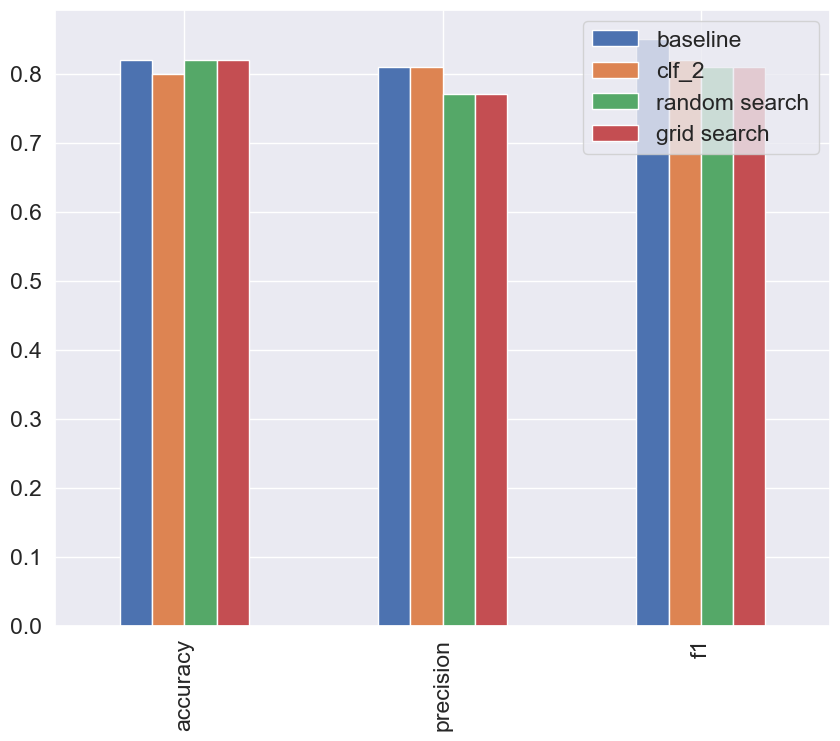

In [172]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics ,
                                "clf_2" : clf_2_metrics ,
                                "random search" : rs_metrics ,
                                "grid search" : gs_metrics})

compare_metrics.plot.bar(figsize=(10 , 8)) ;


## 6. Saving and loading a trained model

Two ways to do this :
1. Python's 'pickle' module 
2. With the 'joblib' module 

**Pickle**

In [173]:

import pickle

# save an existing model to file 

pickle.dump(gs_clf , open("gs_random_forest_model_1.pkl" , "wb"))



#### saving a model 2  : joblib module 

**Joblib**

In [174]:
from joblib  import dump , load
dump(gs_clf , filename =  "gs_random_forest_model.joblib")

['gs_random_forest_model.joblib']

In [175]:
# import a saved joblib  model 
loaded_joblib_model = load(filename = "gs_random_forest_model.joblib")

In [176]:
# make and evauate joblib predictions 
joblib_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test , joblib_preds)

accuracy : 81.9672131147541%
Precision : 0.7741935483870968
Recall :0.8571428571428571
F1 score : 0.8135593220338982


{'accuracy': 0.82, 'precision': 0.77, 'f1': 0.81}

# 7. Putting it all together 

In [177]:
# scikit learn pipeline class 
data = pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [178]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [179]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we have to followw in one cell : 
1. Fill the missing data 
2. Convert data to nos 
3. Build model on the data 

In [180]:
# getting data ready
import pandas as pd 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modeling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split , GridSearchCV


# setup random seed 
import numpy as np 
np.random.seed(42)

# import data and drop rows with missing labels 
data= pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"] , inplace= True)

# define different features and transformer pipelines 
categorical_features = ["Make" , "Colour"]
categorical_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy="constant" , fill_value="missing")) ,
    ("onehot" , OneHotEncoder(handle_unknown="ignore"))
])


door_feature = ["Doors"]
door_transformer = Pipeline(steps = [
                            ("imputer" , SimpleImputer(strategy="constant" , fill_value = 4))
])


numeric_features = ["Odometer (KM)"] 
numeric_transformer = Pipeline(steps = [
    ("imputer" , SimpleImputer(strategy="mean"))
])



# setup the preprocessing steps (fill missng values -> convert to nos )

preprocessor = ColumnTransformer(
    transformers = [
        ("cat" , categorical_transformer , categorical_features) , 
        ("door" , door_transformer , door_feature),
        ("num" , numeric_transformer , numeric_features)
    ]
)

# create preprocessing and modelling pipeline 
model  = Pipeline(steps = [("preprocessor" , preprocessor) , 
                           ("model" , RandomForestRegressor())
                          ])

# split data 
X = data.drop("Price" , axis = 1)
y = data["Price"]

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)


# fit and score the model 
model.fit(X_train , y_train)
model.score(X_test , y_test)





0.22188417408787875

Its also possibe to use **GridSearchCV** or **RandomisedSearchCV** with out **Pipeline**

In [187]:
# use GridSearchCv with our pipeline of regression 
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy" :["mean" , "median"] ,
    "model__n_estimators":[100 , 1000] ,
    "model__max_depth" : [None , 5] ,
    "model__max_features" : ["auto"] ,
    "model__min_samples_split" : [2,4] 
}

gs_model = GridSearchCV(model , pipe_grid , cv =5 , verbose =2 )
gs_model.fit(X_train , y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.0s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

ValueError: 
All the 80 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Ayush Aryan\Desktop\sample1\env\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


NotFittedError: This GridSearchCV instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.